# Lab 01: Data pre-processing

- Student ID: 21120123
- Student name: Lê Thanh Thái Quảng

### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'/home/thaiquang03/miniconda3/envs/anaconda/bin/python'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
# YOUR CODE HERE
raw_df = pd.read_csv("data/spaceX_laucnh.csv")

In [7]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [8]:
# YOUR CODE HERE
shape = raw_df.shape

In [9]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

YOUR ANSWER HERE
- Each line means the information when lauch 1 rocket such as time when launching, name of rocket, lauchpad information and landpad information
- It matters if the lines have different meanings

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [10]:
# YOUR CODE HERE
duplicated_rows = raw_df[raw_df.duplicated()]
num_duplicated_rows = len(duplicated_rows)

In [11]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [12]:
# YOUR CODE HERE
with open("data/metadata.json") as meta_file:
    metadata = pd.DataFrame(json.load(meta_file))

In [13]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
landpad,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The landpad information.
landpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the landing pad.
landpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the landing pad.
landpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the landing pad.
landpad_type,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The type of the landing pad.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
launchpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the launchpad.
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.
outcome,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Boolean indicating launch success or failure.


**TODO: Describe datatype**

YOUR ANSWER HERE

Suitable datatype for each columns:
- uct_time: datetime.
- launch_name: object, specifically string
- payloads: list of dict indicates type (string), mass (float), orbit(string)
- rocket_name: object, specifically string
- rocket_boosters: numeric, specifically integer
- rocket_height: numeric, specifically float
- rocket_diameter: numeric, specifically float
- rocket_mass: numeric, specifically float
- launchpad_name: object, specifically string
- launchpad_region: object, specifically string
- launchpad_geo: tuple with 2 float
- landpad: object, specifically string
- landpad_name: object, specifically string
- landpad_type: object, specifically string
- landpad_region: object, specifically string
- landpad_geo: tuple with 2 float
- outcome: boolen

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [14]:
# YOUR CODE HERE
dtypes = raw_df.dtypes

In [15]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [16]:
# YOUR CODE HERE
raw_df["uct_time"] = pd.to_datetime(raw_df["uct_time"])

In [17]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [18]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


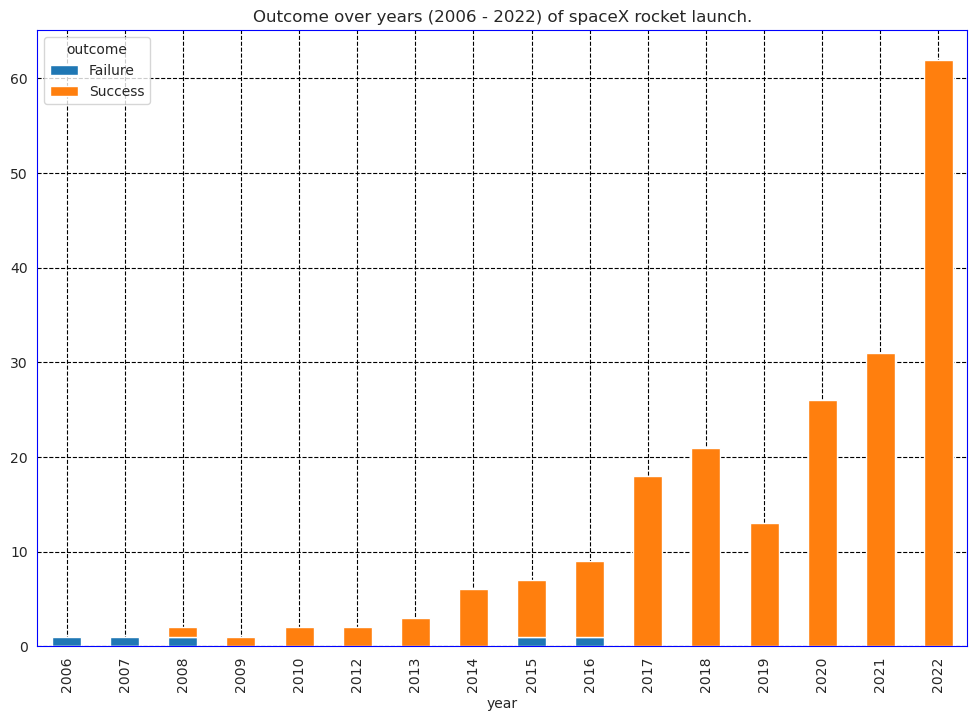

In [19]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

In the years of 2016-2018, the number of launches was low, with a high rate of failure. However, the number of launches increased steadily, with successful launches dominating. From 2017 to 2021, all missile launches were successful.

### Exploring numerical attributes

In [20]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [21]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return round((s.isnull().sum() / s.shape[0]) * 100, 1)

def median(df):
    # TODO:
    # YOUR CODE HERE
    return round(df.median(), 1)

def lower_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return round(df.quantile(0.25), 1)

def upper_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return round(df.quantile(0.75), 1)

In [22]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [23]:
# YOUR CODE HERE
attr_missing_ratio = num_col_df.agg(missing_ratio)
cols_to_drop = attr_missing_ratio[attr_missing_ratio > 70].index
num_col_df = num_col_df.drop(columns=cols_to_drop)
raw_df = raw_df.drop(columns=cols_to_drop)

In [24]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [25]:
# YOUR CODE HERE
## Mean fill
fill_value = num_col_df["rocket_height"].mean()
num_col_df["mean_fill_rocket_height"] = num_col_df["rocket_height"].fillna(fill_value)

In [26]:
# YOUR CODE HERE
## Median fill
fill_value = num_col_df["rocket_height"].median()
num_col_df["median_fill_rocket_height"] = num_col_df["rocket_height"].fillna(fill_value)

In [27]:
# YOUR CODE HERE
## Mode fill
fill_value = num_col_df["rocket_height"].mode()[0]
num_col_df["mode_fill_rocket_height"] = num_col_df["rocket_height"].fillna(fill_value)

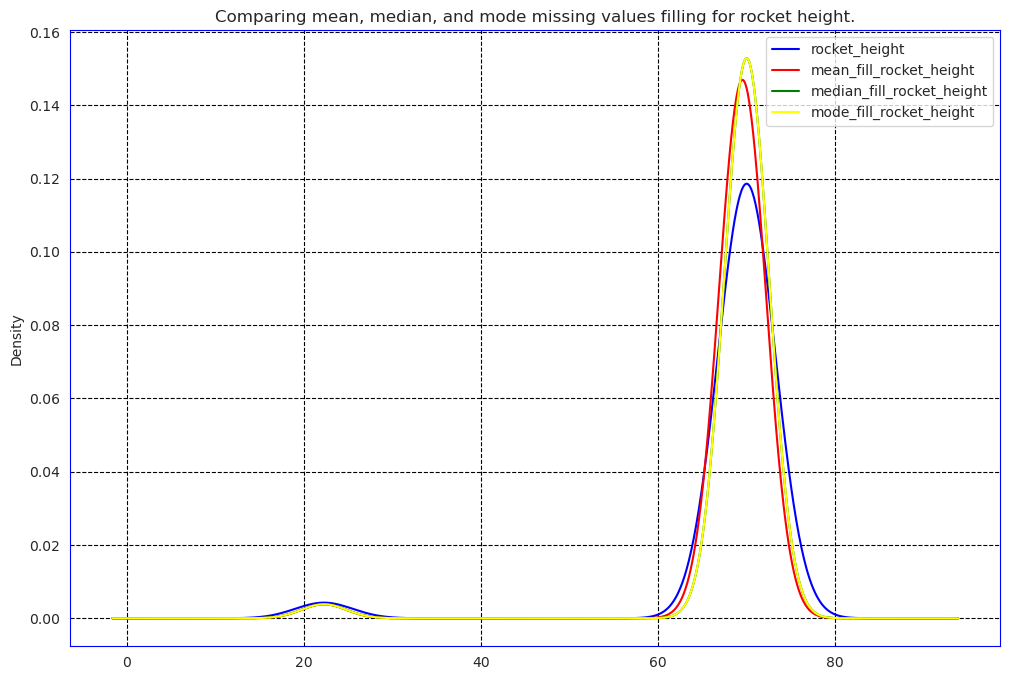

In [28]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

- The shape of the chart of density of rocket height from 60 ot 80 seems to be symmetric
- The density of mode and median are higher than the density of mean


**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [29]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    raw_df_by_rocket_name = raw_df.loc[raw_df["rocket_name"] == rocket_name]
    minn = raw_df_by_rocket_name["rocket_height"].min()
    maxx = raw_df_by_rocket_name["rocket_height"].max()
    return (minn, maxx)

In [30]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [31]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [32]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [33]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    fill_value = cp_df["rocket_height"].median()
    cp_df["rocket_height"].fillna(fill_value, inplace=True)
    return cp_df

raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [34]:
# YOUR CODE HERE
# Choose mean fill
fill_diameter_value = raw_df["rocket_diameter"].mean()
raw_df["rocket_diameter"].fillna(fill_diameter_value, inplace=True)

fill_mass_value = raw_df["rocket_mass"].mean()
raw_df["rocket_mass"].fillna(fill_mass_value, inplace=True)

In [35]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [36]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values
assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

YOUR ANSWER HERE

- rocket_boosters: discrete
- rocket_height: continous
- rocket_diameter: continous
- rocket_mass: continous

### Exploring non-numerical attributes

In [37]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [38]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    # YOUR CODE HERE
    result = eval(s)
    return result

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [39]:
# TODO:
# YOUR CODE HERE
cate_col_df["payloads"] = cate_col_df["payloads"].astype(str)
cate_col_df["payloads"] = cate_col_df["payloads"].apply(str2dict)
cate_col_df = cate_col_df.explode("payloads")
cate_col_df["payloads"] = cate_col_df["payloads"].astype(str)

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [40]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return round((s.isnull().sum() / s.shape[0]) * 100, 1)

def num_values(s):
    # TODO:
    # YOUR CODE HERE
    return s.nunique()

def value_ratios(s):
    # TODO:
    # YOUR CODE HERE
    return round((s.value_counts() / s.shape[0]) * 100, 1).to_dict()

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,147,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'CRS-1': 1.0, 'COTS ...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 11.5, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 30.6, 'JRTI': 19.6, 'ASOG': 10.0, 'LZ-1': 8.6, 'LZ-4': 2.9, 'JRTI-1': 1.0}","{'ASDS': 61.2, 'RTLS': 11.5, 'Ocean': 3.3}","{'Florida': 28.2, 'California': 24.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [41]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

YOUR ANSWER HERE

We shoudn't delete these columns because it may cause loss of information, we should find some rules to fill the missing value first. After that, if the attribute still has high ratio of missing value, we will delete.

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [42]:
# TODO:
# YOUR CODE HERE
attrs = ["landpad_name", "landpad_type", "landpad_region"]
cate_col_df = cate_col_df.dropna(subset=attrs, thresh=2).reset_index(drop=True)

In [43]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [44]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'Transporter-2': 0.7, 'CRS-23': 0.7, 'St...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 38.8, 'California': 33.6}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

YOUR ANSWER HERE
- Falcon 9 rockets which have launchpad in California and have landpad in California that have no missing values.
- Falcon 9 rockets which have launchpad in California and have landpad in Florida that have no missing values. Their land name and type are JRTI and ASDS, respectively
- Falcon Heavy rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`|

TODO: What are the further rules you can find?

YOUR ANSWER HERE
- Falcon 9 rockets which have landpad name is `JRTI-1`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `LZ-1`, and landpad type is `RTLS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `LZ-4`, and landpad type is `RTLS` => landpad region `California`
- Falcon Heavy rockets which have landpad name is `OCISLY`, and landpad type is `RTLS` => landpad region `California`

In [45]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # YOUR CODE HERE
    if (df is None):
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    df_cp.loc[(df_cp["landpad_name"] == "OCISLY") & (df_cp["landpad_type"] == "ASDS") & (df_cp["landpad_region"].isnull()), "landpad_region"] = "California"
    df_cp.loc[(df_cp["landpad_name"] == "JRTI") & (df_cp["landpad_type"] == "ASDS") & (df_cp["landpad_region"].isnull()), "landpad_region"] = "Florida"
    df_cp.loc[(df_cp["landpad_name"] == "ASOG") & (df_cp["landpad_type"] == "ASDS") & (df_cp["landpad_region"].isnull()), "landpad_region"] = "Florida"
    df_cp.loc[(df_cp["landpad_name"] == "LZ-1") & (df_cp["landpad_type"] == "RTLS") & (df_cp["landpad_region"].isnull()), "landpad_region"] = "Florida"
    df_cp.loc[(df_cp["landpad_name"] == "LZ-4") & (df_cp["landpad_type"] == "RTLS") & (df_cp["landpad_region"].isnull()), "landpad_region"] = "California"
    df_cp.loc[(df_cp["landpad_name"] == "JRTI-1") & (df_cp["landpad_type"] == "ASDS") & (df_cp["landpad_region"].isnull()), "landpad_region"] = "Florida"
    
    return df_cp

cate_col_df = fill_landpadregion(cate_col_df)

In [46]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'Transporter-2': 0.7, 'CRS-23': 0.7, 'St...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [47]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [48]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

# YOUR CODE HERE
raw_df = raw_df.explode("payloads")
raw_df["payloads"] = raw_df["payloads"].astype(str)

# Drop NaN value
attrs = ["landpad_name", "landpad_type", "landpad_region"]
raw_df = raw_df.dropna(subset=attrs, thresh=2).reset_index(drop=True)

# Fill landpad_region
raw_df = fill_landpadregion(raw_df)

In [49]:
# TEST 01
assert raw_df.shape == (152, 16)

In [50]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'Transporter-2': 0.7, 'CRS-23': 0.7, 'St...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [51]:
# Must conver payloads to dict first
cate_col_df["payloads"] = cate_col_df["payloads"].apply(str2dict)

cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [52]:
# YOUR CODE HERE
attrs = ["type", "mass", "orbit"]
cate_col_df2 = cate_col_df2.dropna(subset=attrs, thresh=2).reset_index(drop=True)

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [53]:
# YOUR CODE HERE
drop_idx = cate_col_df2[cate_col_df2["mass"].isnull()].index

In [54]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [55]:
cate_col_df2.drop(drop_idx, inplace=True)

In [56]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [57]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
raw_df["payloads"] = raw_df["payloads"].astype(str)
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)
raw_df = raw_df.join(pd.DataFrame(raw_df["payloads"].tolist())).drop("payloads", axis=1)  

In [58]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df = raw_df.rename(columns={"type": "payloads_type", "mass": "payloads_mass", "orbit": "payloads_orbit",})

In [59]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
attrs = ["payloads_type", "payloads_mass", "payloads_orbit"]
raw_df = raw_df.dropna(subset=attrs, thresh=2).reset_index(drop=True)

In [60]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
drop_idx = raw_df[raw_df["payloads_mass"].isnull()].index
raw_df.drop(drop_idx, inplace=True)

In [61]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [62]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [63]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    return tuple(s.strip("()").split(","))

In [64]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [65]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [66]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.5618571,-80.577366,28.4104,-80.6188
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.5618571,-80.577366,28.4104,-80.6188
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.5618571,-80.577366,33.7291858,-118.262015
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.5618571,-80.577366,28.485833,-80.544444
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.4104,-80.6188


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `nominal` attributes, you should use `one hot encoding`, and for `ordinal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

launch_name is `nominal`

In [67]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["launch_name"])

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

rocket_name is is `nominal`

In [68]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["rocket_name"])

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

launchpad_name is `nominal`

In [69]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["launchpad_name"])

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

aunchpad_region is `nominal`

In [70]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["launchpad_region"])

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

landpad_name is `nominal`

In [71]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["landpad_name"])

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

landpad_type is `nominal`

In [72]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["landpad_type"])

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

landpad_region is `nominal`

In [73]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["landpad_region"])

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

outcome is `nominal`

In [74]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["outcome"])

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

payloads_type is `nominal`

In [75]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["payloads_type"])

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

payloads_orbit is `nominal`

In [76]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["payloads_orbit"])

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [77]:
# YOUR CODE HERE
raw_df.dtypes

uct_time               datetime64[ns, UTC]
rocket_boosters                      int64
rocket_height                      float64
rocket_diameter                    float64
rocket_mass                        float64
                              ...         
payloads_orbit_MEO                    bool
payloads_orbit_PO                     bool
payloads_orbit_SSO                    bool
payloads_orbit_TLI                    bool
payloads_orbit_VLEO                   bool
Length: 185, dtype: object

In [78]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [79]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_na

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

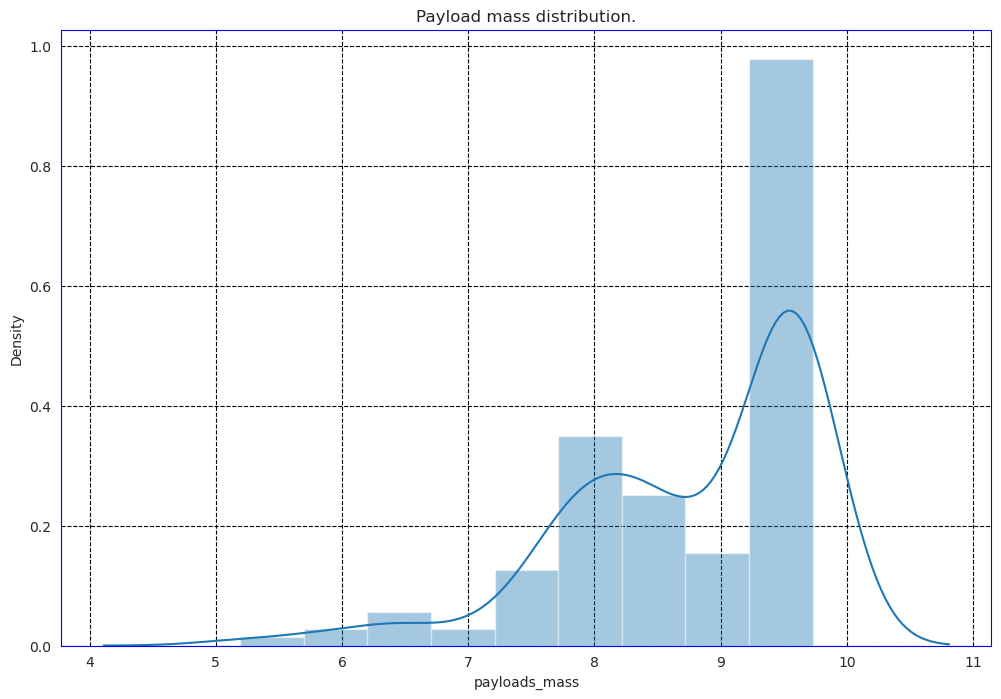

In [80]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [81]:
# YOUR CODE HERE
# raise NotImplementedError()
# mass_range = ?
minn = raw_df["payloads_mass"].min()
maxx = raw_df["payloads_mass"].max()
mass_range = maxx - minn

In [82]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [83]:
# YOUR CODE HERE
# lower_interval =?
# upper_interval =?
lower_interval = int(np.floor(raw_df["payloads_mass"].min()))
upper_interval = int(np.ceil(raw_df["payloads_mass"].max()))

In [84]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [85]:
# YOUR CODE HERE
# interval_size =?
interval_size = (upper_interval - lower_interval) / 4

# total_bins =?
q1 = raw_df["payloads_mass"].quantile(0.25)
q3 = raw_df["payloads_mass"].quantile(0.75)
n = len(raw_df["payloads_mass"])
total_bins = round((upper_interval - lower_interval) / (2 * (q3 - q1)* n**(-1/3)))

bin_upper_edges = []
for i in range(0, 5):
    bin_upper_edges.append(lower_interval + i * interval_size)

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [86]:
# YOUR CODE HERE
labels = ["bin_no_1", "bin_no_2", "bin_no_3", "bin_no_4"]

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [87]:
# YOUR CODE HERE
raw_df["payloads_mass_bins"] = pd.cut(raw_df["payloads_mass"], bins=bin_upper_edges, labels=labels)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

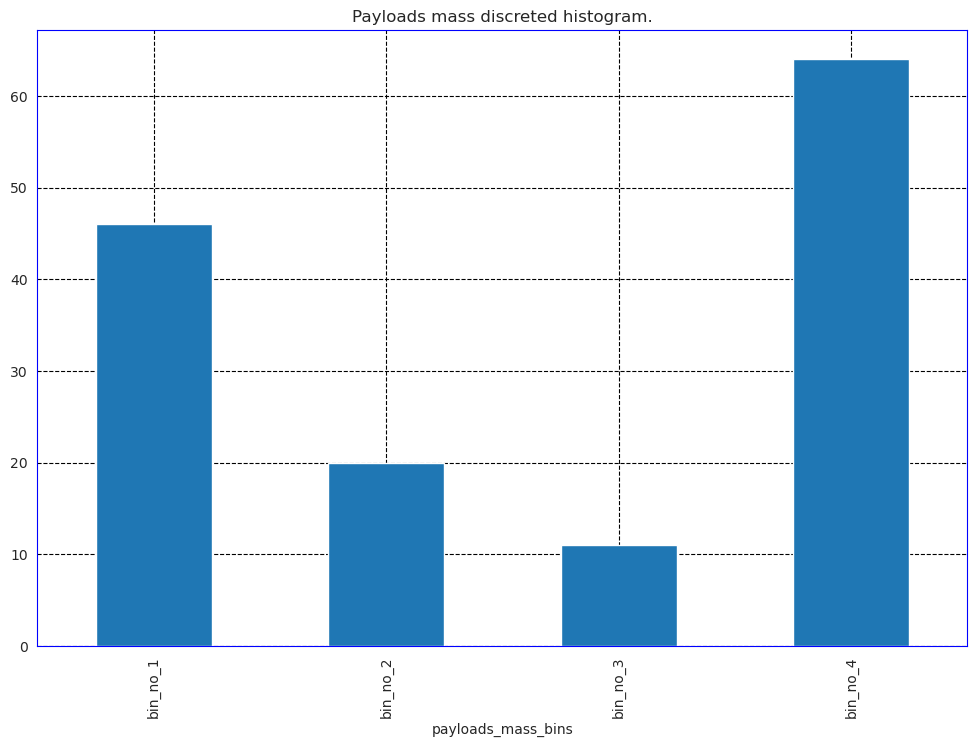

In [88]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

The number of values in each bin is not equal.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [89]:
# YOUR CODE HERE
raw_df["payloads_mass_bins"] = pd.qcut(raw_df["payloads_mass"], total_bins, labels=labels)

- Step 02: Create bin labels

In [90]:
# YOUR CODE HERE
labels = ["bin_no_1", "bin_no_2", "bin_no_3", "bin_no_4"]

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [91]:
# YOUR CODE HERE
raw_df["payloads_mass_bins"] = pd.cut(raw_df["payloads_mass"], bins=total_bins, labels=labels)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

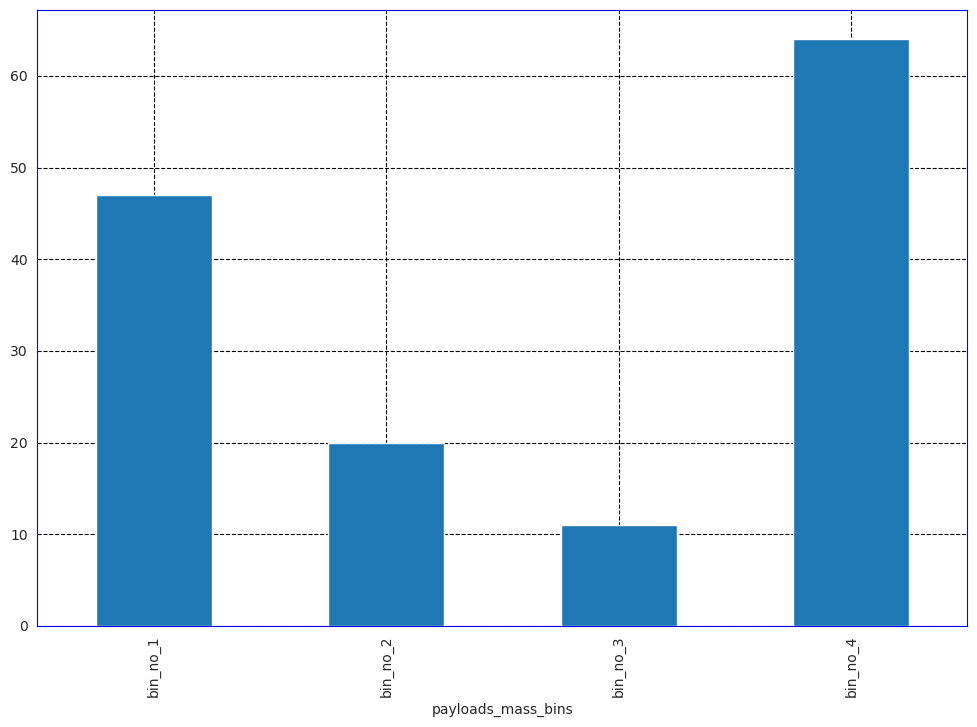

In [92]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

In [93]:
# YOUR CODE HERE (Optional)
# raise NotImplementedError()

In [94]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

Text(0, 0.5, 'Unit of payloads_mass')

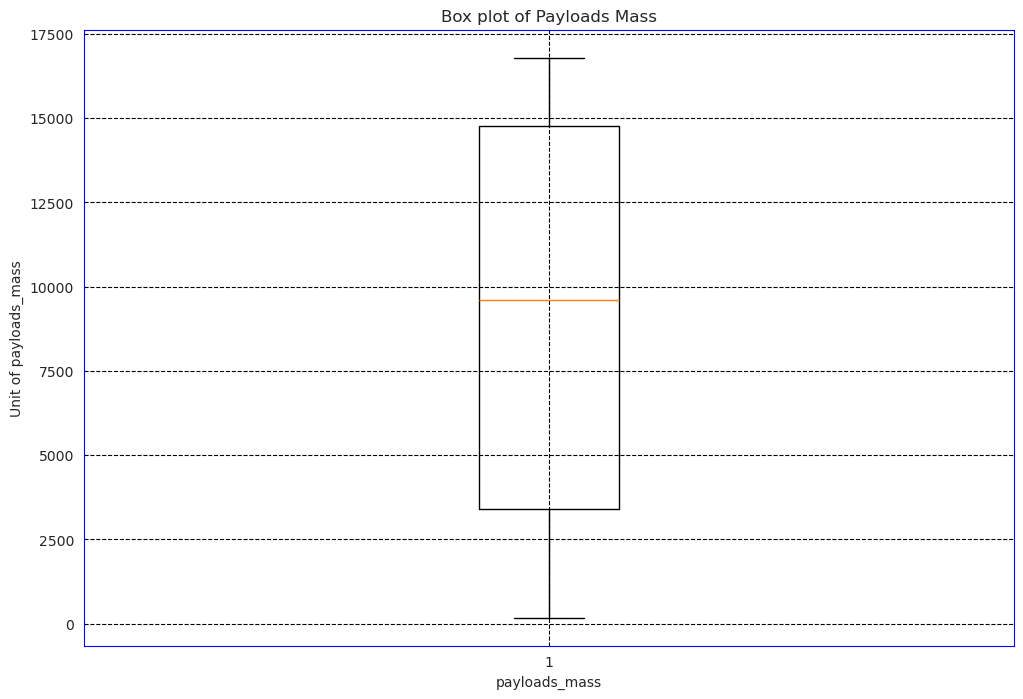

In [95]:
# YOUR CODE HERE
plt.boxplot(raw_df["payloads_mass"]);
plt.title("Box plot of Payloads Mass");
plt.xlabel("payloads_mass");
plt.ylabel("Unit of payloads_mass")

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [96]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [97]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [98]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

YOUR ANSWER HERE

- Advantages: reduce sensitive when mining data
- Disadvantages: loss of information

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

YOUR ANSWER HERE

IQR = Q3 - Q1 with Q1 is the 25th percentile and Q3 is the 75th perentile

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [99]:
# YOUR CODE HERE
meann = np.mean(raw_df["payloads_mass"])
stdd = np.std(raw_df["payloads_mass"])
upper_bound = meann + 3 * stdd
lower_bound = meann - 3 * stdd

- Step 02: Construct rule for trimming outliers.

In [100]:
# YOUR CODE HERE
payloads_mass_outliers = np.where((raw_df["payloads_mass"] < lower_bound) | (raw_df["payloads_mass"] > upper_bound), True, False)

- Step 03: Trimming outliers

In [101]:
# YOUR CODE HERE
raw_df_without_payloads_mass_outliers = raw_df.loc[~(payloads_mass_outliers), ]
raw_df.shape, payloads_mass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

YOUR ANSWER HERE
- Advantages of using mean and standard deviation: easy to calculate mean and standard deviation
- Disadvantages of using mean and standard deviation: if the data is skewed, the accuracy is affected
- Quartile distance normally used to cap outliers via mean and standard deviation is interquartile Range (IQR). The outliers occur within 1.5 × IQR of the quartiles

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [102]:
# YOUR CODE HERE
upper_bound = raw_df["payloads_mass"].quantile(0.9)
lower_bound = raw_df["payloads_mass"].quantile(0.1)

- Step 02: Construct rule for trimming outliers.

In [103]:
# YOUR CODE HERE
payloads_mass_outliers = np.where((raw_df["payloads_mass"] < lower_bound) | (raw_df["payloads_mass"] > upper_bound), True, False)

- Step 03: Trimming outliers

In [104]:
# YOUR CODE HERE
raw_df_without_payloads_mass_outliers = raw_df.loc[~(payloads_mass_outliers), ]
raw_df.shape, payloads_mass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of using Quantiles?

YOUR ANSWER HERE
- Advantages: We can easily change the thresholds
- Disdvantages: Have to find suitable thresholds

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [105]:
scaler = StandardScaler()

- Step 02: Fitting

In [106]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [107]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [108]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transp

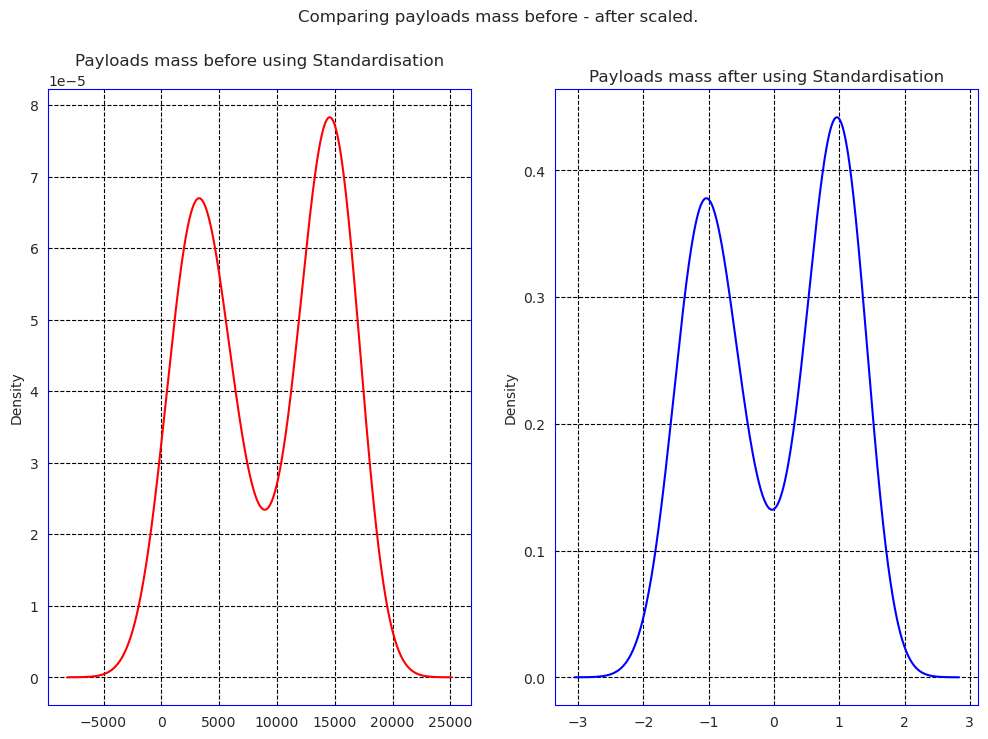

In [109]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE
- The shape of two graph is similar
- The range of the value when using scalling is much less thanh when not using scalling
- The density of value when using scalling is higher than when not using scalling

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

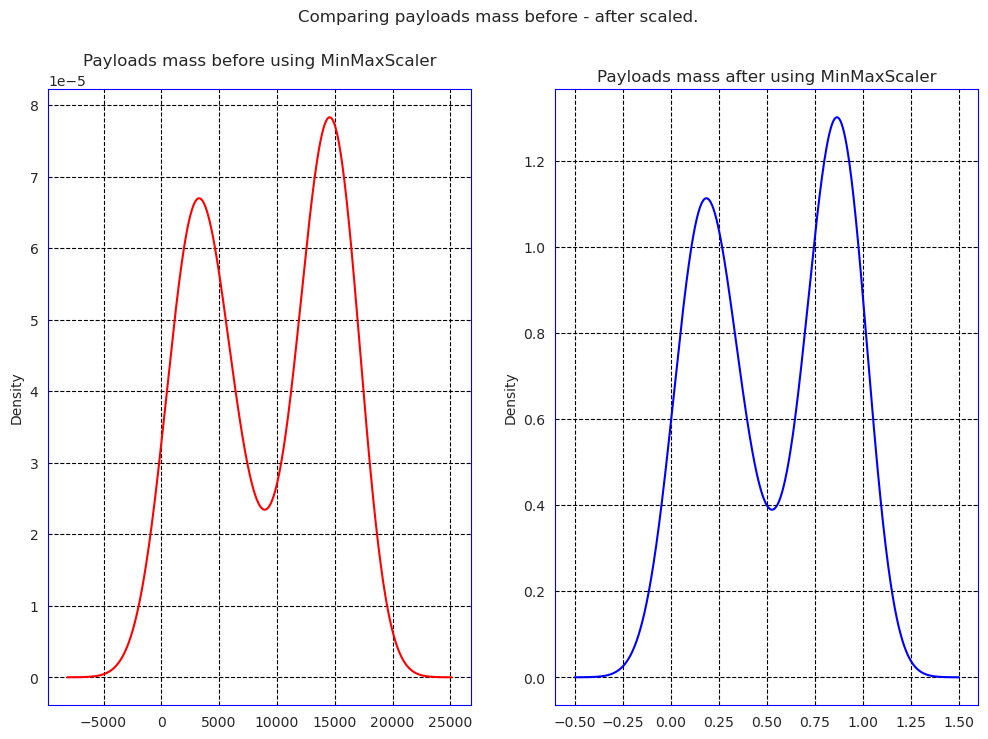

In [110]:
# YOUR CODE HERE
# raise NotImplementedError()

# Scale
scaler = MinMaxScaler()
scaler.fit(raw_df[["payloads_mass"]])
raw_df["payloads_mass_min_max"] = scaler.transform(raw_df[["payloads_mass"]])
raw_df.head()

# Visualize
fig, axes = plt.subplots(1, 2);

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red");
raw_df["payloads_mass_min_max"].plot(kind="kde", ax=axes[1], color="blue");

axes[0].set_title("Payloads mass before using MinMaxScaler");
axes[1].set_title("Payloads mass after using MinMaxScaler");
fig.suptitle("Comparing payloads mass before - after scaled.");

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- The shape of two graph is similar
- The range of the value when using scalling is much less thanh when not using scalling
- The density of value when using scalling is higher than when not using scalling

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

*Give your obervation here*
- Min/Max makes the range of values between 0 and 1
- Mean normalization makes the values around 0

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

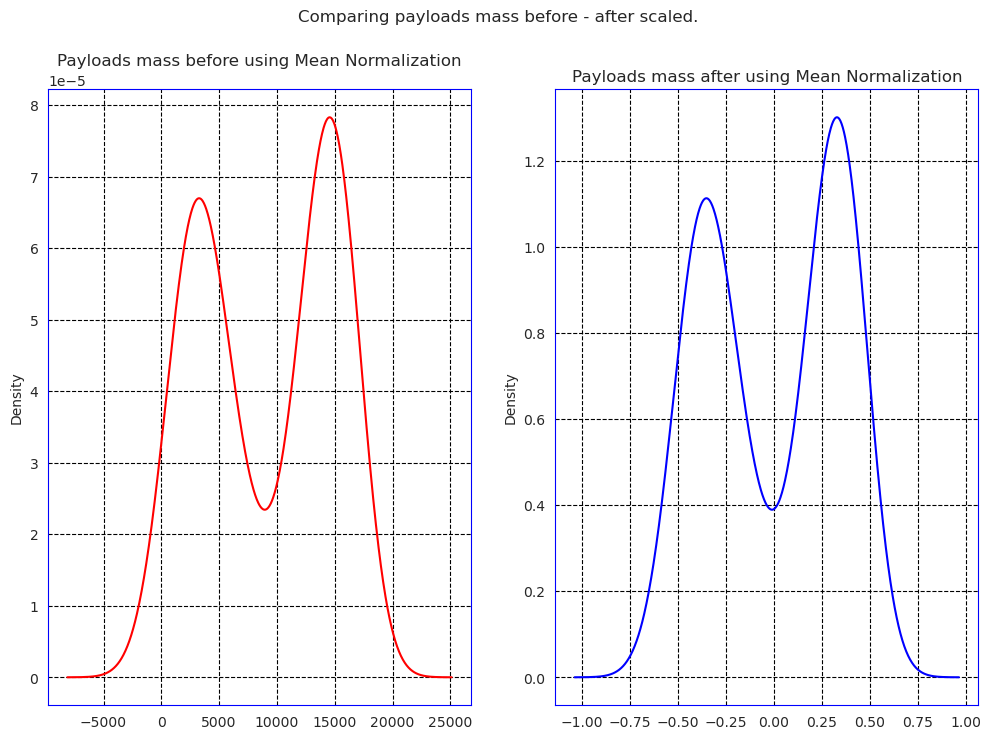

In [111]:
# YOUR CODE HERE
# raise NotImplementedError()

# Scale
payloads_mass_mean = raw_df["payloads_mass"].mean()
payloads_mass_range = raw_df["payloads_mass"].max() - raw_df["payloads_mass"].min()
raw_df["payloads_mass_mean_nor"] = (raw_df["payloads_mass"] - payloads_mass_mean) / payloads_mass_range

# Visualize
fig, axes = plt.subplots(1, 2);

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red");
raw_df["payloads_mass_mean_nor"].plot(kind="kde", ax=axes[1], color="blue");

axes[0].set_title("Payloads mass before using Mean Normalization");
axes[1].set_title("Payloads mass after using Mean Normalization");
fig.suptitle("Comparing payloads mass before - after scaled.");

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- The shape of two graph is similar
- The range of the value when using scalling is much less thanh when not using scalling
- The density of value when using scalling is higher than when not using scalling

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

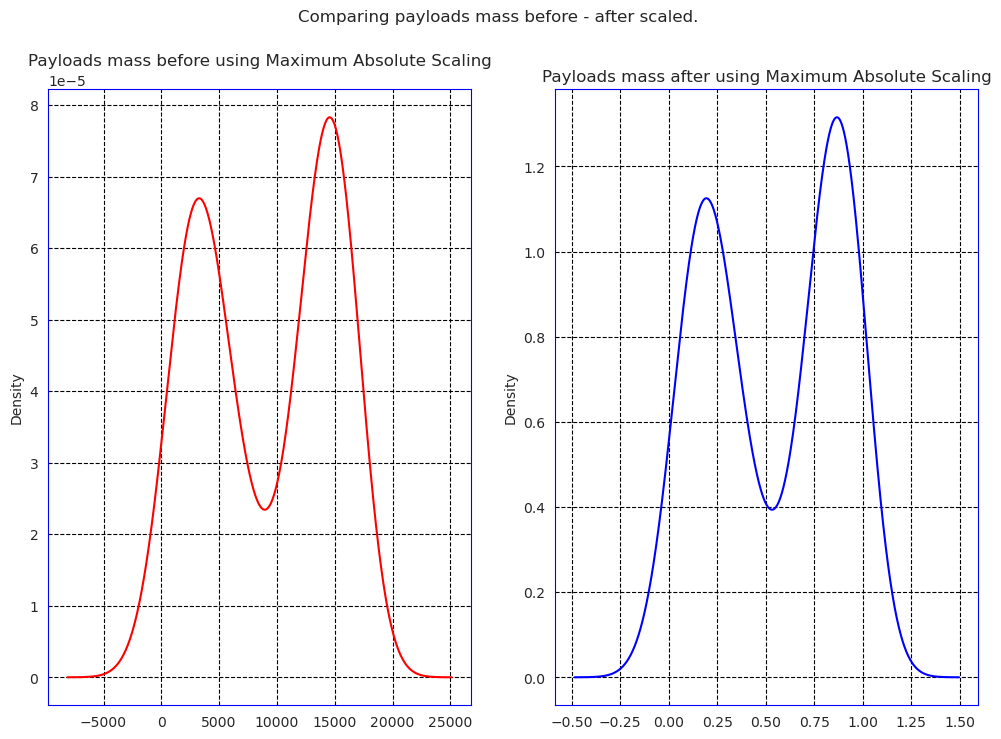

In [112]:
# YOUR CODE HERE
# raise NotImplementedError()

# Scale
scaler = MaxAbsScaler()
scaler.fit(raw_df[["payloads_mass"]])
raw_df["payloads_mass_max_abs"] = scaler.transform(raw_df[["payloads_mass"]])
raw_df.head()

# Visualize
fig, axes = plt.subplots(1, 2);

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red");
raw_df["payloads_mass_max_abs"].plot(kind="kde", ax=axes[1], color="blue");

axes[0].set_title("Payloads mass before using Maximum Absolute Scaling");
axes[1].set_title("Payloads mass after using Maximum Absolute Scaling");
fig.suptitle("Comparing payloads mass before - after scaled.");

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- The shape of two graph is similar
- The range of the value when using scalling is much less thanh when not using scalling
- The density of value when using scalling is higher than when not using scalling

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

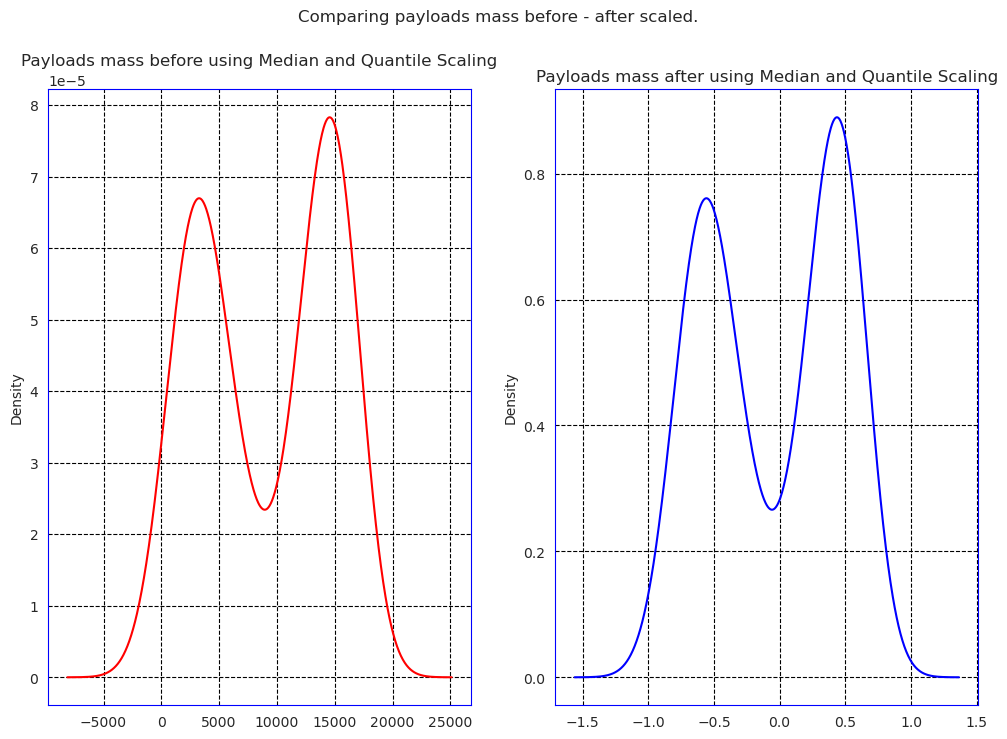

In [113]:
# YOUR CODE HERE
# raise NotImplementedError()
# Scale
q1 = raw_df["payloads_mass"].quantile(0.25)
q3 = raw_df["payloads_mass"].quantile(0.75)
meann = np.median(raw_df["payloads_mass"])
raw_df["payloads_mass_median_quantile"] = (raw_df[["payloads_mass"]] - meann)/(q3 - q1)
raw_df.head()

# Visualize
fig, axes = plt.subplots(1, 2);

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red");
raw_df["payloads_mass_median_quantile"].plot(kind="kde", ax=axes[1], color="blue");

axes[0].set_title("Payloads mass before using Median and Quantile Scaling");
axes[1].set_title("Payloads mass after using Median and Quantile Scaling");
fig.suptitle("Comparing payloads mass before - after scaled.");

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- The shape of two graph is similar
- The range of the value when using scalling is much less thanh when not using scalling
- The density of value when using scalling is higher than when not using scalling

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

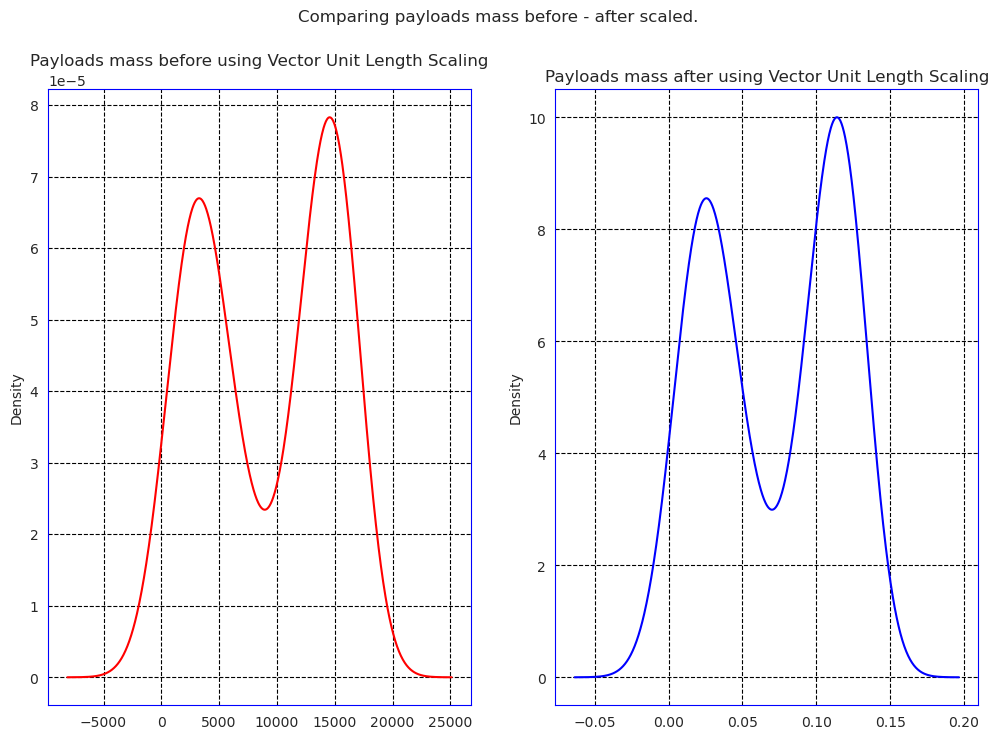

In [114]:
# YOUR CODE HERE
# raise NotImplementedError()

# Scale
raw_df["payloads_mass_vector_unit"] = raw_df[["payloads_mass"]] / np.linalg.norm(raw_df[["payloads_mass"]])

# Visualize
fig, axes = plt.subplots(1, 2);

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red");
raw_df["payloads_mass_vector_unit"].plot(kind="kde", ax=axes[1], color="blue");

axes[0].set_title("Payloads mass before using Vector Unit Length Scaling");
axes[1].set_title("Payloads mass after using Vector Unit Length Scaling");
fig.suptitle("Comparing payloads mass before - after scaled.");

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE
- The shape of two graph is similar
- The range of the value when using scalling is much less thanh when not using scalling
- The density of value when using scalling is higher than when not using scalling

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

YOUR ANSWER HERE

We should apply these techniques on numeric attributes and when there is a large disparity between the values of attributes.

End of your lab 01.